In [3]:
import os
import glob
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os 
import seaborn

import sys
sys.path.append('../')
import JetMatchesSet


ml_results = JetMatchesSet.MLResultsSets()
ml_results.trim_brick_gte(20)
ml_results.sort('is_lbt', 'brick')

# matter_paths = glob.glob('./matter/**/rss_score.json', recursive=True)
# lbt_paths = glob.glob('./lbt/**/rss_score.json', recursive=True)
# all_paths = matter_paths + lbt_paths
# for result in ml_results:
#     if (result.brick == 20):
#         continue

#     rdict = {
#         'is_lbt': is_lbt,
#         'brick_len': brick_len,
#         'temp': temp,
#         'pthat': pthat,
#         'features' : x_keys,
#     }
#     rdict.update(data)
#     results.append(rdict)

df = ml_results.dataframe()
df.to_csv('rss_score.csv', index=False)
print(df.columns)
print(df)
print(df.is_lbt)


/home/davidstewart/penv-ML/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/davidstewart/penv-ML/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[<JetMatchesSet.ML_Result object at 0x7d5d6b942560>, <JetMatchesSet.ML_Result object at 0x7d5d6b9426e0>, <JetMatchesSet.ML_Result object at 0x7d5d6b942860>, <JetMatchesSet.ML_Result object at 0x7d5d6b943010>, <JetMatchesSet.ML_Result object at 0x7d5d6b943040>, <JetMatchesSet.ML_Result object at 0x7d5d6b943220>, <JetMatchesSet.ML_Result object at 0x7d5d6b9433a0>, <JetMatchesSet.ML_Result object at 0x7d5d6b943520>, <JetMatchesSet.ML_Result object at 0x7d5d6b943cd0>, <JetMatchesSet.ML_Result object at 0x7d5d6b943d00>, <JetMatchesSet.ML_Result object at 0x7d5d6b943ee0>, <JetMatchesSet.ML_Result object at 0x7d5d66f100a0>, <JetMatchesSet.ML_Result object at 0x7d5d66f10220>, <JetMatchesSet.ML_Result object at 0x7d5d66f109d0>, <JetMatchesSet.ML_Result object at 0x7d5d66f10a00>, <JetMatchesSet.ML_Result object at 0x7d5d66f10be0>, <JetMatchesSet.ML_Result object at 0x7d5d66f10d60>, <JetMatchesSet.ML_Result object at 0x7d5d66f10ee0>, <JetMatchesSet.ML_Result object at 0x7d5d66f11690>, <JetMatches

In [4]:
# Get the number of unique brick lengths and get the color spectrum for them
import matplotlib.cm as cm
import numpy as np

print(dir(cm))

pt0 = df.pT0.unique()
pt0.sort()
print(pt0)
# list_colors = cm.viridis(np.linspace(0, 0.8, len(pt0)))
list_colors = cm.viridis(np.linspace(0, 0.8, len(pt0)))
list_colors = cm.cividis(np.linspace(0, 0.8, len(pt0)))
colors = {pt0[i]: list_colors[i] for i in range(len(pt0))}
print(colors.keys())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'MutableMapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_DeprecatedCmapDictWrapper', '_LUTSIZE', '__builtin_cmaps', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__spec__', '_

/tmp/ipykernel_150189/3806172290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
/tmp/ipykernel_150189/3806172290.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(yticklabels)


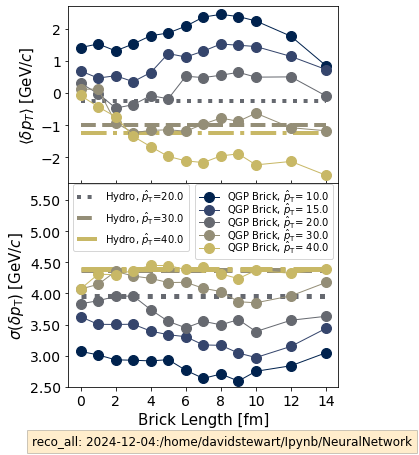

In [5]:
def plot_all_scores(features='reco_all', title=r'$\rho\times{}A'):
    plotML = True;
    key_stub = ('ML' if plotML else 'rhoA')
    col_std  = f'std_delta_{key_stub}_all'
    col_mean = f'mean_delta_{key_stub}_all'

    # print(df.head())
    df_loc = df[df['features'] == features]
    # print(f'df_loc: {df_loc}  features: {features}')
    def make_name(row):
        if row.is_hydro:
            return f"hydro {row.pthat} features={row.features}"
        else:
            return f"is LBT={row['is_lbt']} pthat={row['pthat']} features={row['features']}"

    df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
    all_keys = df_loc.plot_names.unique()
    all_keys.sort()

    fig, axs = plt.subplots(2,1,figsize=(5, 7),gridspec_kw={'height_ratios':[1,1.15]})
    plt.subplots_adjust(right=0.95, hspace=0.0, left=0.20)  # Adjust right margin
    # plt.subplots_adjust(right=0.5)  # Adjust right margin

    handles_hydro = []
    handles_brick = []

    for key in all_keys:
        x = df_loc[df_loc.plot_names == key]['brick_len'].array
        y = df_loc[df_loc.plot_names == key][col_mean].array
        if 'hydro' in key:
            pt0 = float(key.split()[1])
        else:
            pt0=float(key.split()[2].split('=')[1])
        pairs = list(zip(x,y))
        pairs.sort()
        x, y = zip(*pairs)
        markersize=10
        if 'hydro' in key:
            mtype = 'D'
            markersize=14
            if pt0 == 20:
                linestyle=':'
            elif pt0 == 30:
                linestyle = '--'
            elif pt0 == 40:
                linestyle = '-.'
            line, = axs[0].plot( [0., 14.], [y, y], label=r'Hydro, $\hat{p}_\mathrm{T}$='+f'{pt0}', markersize=markersize, marker='', linestyle=linestyle, linewidth=4, color=colors[pt0])
            handles_hydro.append(line)

            x = df_loc[df_loc.plot_names == key]['brick_len'].array
            y = df_loc[df_loc.plot_names == key][col_std].array
            # axs[1].plot( [0., 14.], [y, y], label=r'Hydro, $\hat{p}_\mathrm{T}$='+f'{pt0}', markersize=markersize, marker='', linestyle=linestyle,color=colors[pt0])
            axs[1].plot( [0., 14.], [y, y], markersize=markersize, marker='', linestyle=linestyle,linewidth=5,color=colors[pt0])
        elif 'True' in key:
            mtype = 'o'
            point,  = axs[0].plot( x,y, label=r'QGP Brick, $\hat{p}_\mathrm{T}$= '+f'{pt0}',markersize=markersize, marker=mtype, linestyle='-',linewidth=1,color=colors[pt0])
            handles_brick.append(point)
            x = df_loc[df_loc.plot_names == key]['brick_len'].array
            y = df_loc[df_loc.plot_names == key][col_std].array
            pairs = list(zip(x,y))
            pairs.sort()
            x, y = zip(*pairs)
            axs[1].plot( x,y,  marker=mtype, markersize=markersize, linestyle='-',linewidth=1,color=colors[pt0])
        else:
            continue

    axs[0].set_xlabel('Brick Length [fm]')
    axs[0].set_ylabel(r'$\left<\delta{}p_{T}\right>\;\mathrm{[GeV/\mathit{c}]}$',fontsize=15)

    axs[1].set_xlabel('Brick Length [fm]',fontsize=15)
    axs[1].set_ylabel(r'$\sigma(\delta{}p_{\rm T})\;\mathrm{[GeV/\mathit{c}]}$',fontsize=15)
    ylim_default = axs[1].get_ylim()
    ylo = ylim_default[0]
    yhi = ylim_default[1]
    yhi_new = yhi+0.6*(yhi-ylo)
    axs[1].set_ylim([ylo,yhi_new])
    axs[0].set_xticks([0,2,4,6,8,10,12,14])
    axs[1].set_xticks([0,2,4,6,8,10,12,14])
    axs[0].tick_params(axis='both', labelsize=14)
    axs[0].tick_params(axis='x', direction='in')
    axs[1].tick_params(axis='both', labelsize=14)
    # axs[1].set_ylim([5.5,11.3])

    leg1 = axs[1].legend(loc='upper left',handles=handles_hydro, bbox_to_anchor=[0.0,0.92,0.5,0.1])
    leg2 = axs[1].legend(loc='upper left',handles=handles_brick, bbox_to_anchor=[0.45,0.92,0.5,0.1],labelspacing=-0.35)
    axs[1].add_artist(leg1)

    datetime = pd.to_datetime('today').strftime('%Y-%m-%d')
    plt.figtext(0.1, 0.01, f'{features}: {datetime}:{os.getcwd()}', fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    # Get the current y-tick labels
    yticks = axs[1].get_yticks()
    yticklabels = [f'{ytick:.2f}' for ytick in yticks]  # Format the y-tick labels as needed

    # Modify the last y-tick label if necessary
    if yticklabels:
        yticklabels[-1] = ''  # Remove the last y-tick label
        # yticklabels[-2] = ''  # Remove the last y-tick label

    # Set the modified y-tick labels back to the axis
    axs[1].set_yticklabels(yticklabels)
    plt.show()

    if not os.path.isdir('figs/mean_std_prog'):
        os.makedirs('figs/mean_std_prog')
    fig.savefig(f'figs/mean_std_prog/{features}.pdf')


plot_all_scores('reco_all',r'Reco All')

/tmp/ipykernel_150189/3806172290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
/tmp/ipykernel_150189/3806172290.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(yticklabels)


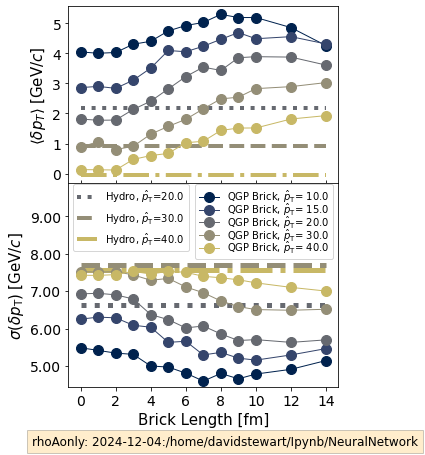

/tmp/ipykernel_150189/3806172290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
/tmp/ipykernel_150189/3806172290.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(yticklabels)


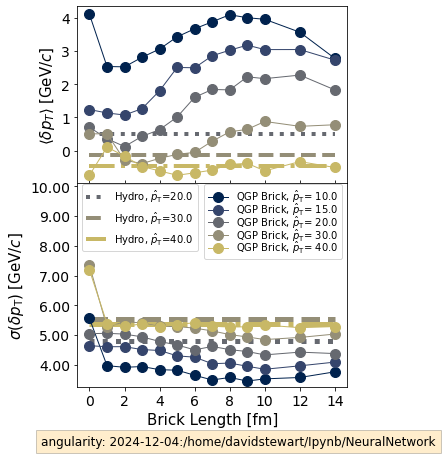

/tmp/ipykernel_150189/3806172290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
/tmp/ipykernel_150189/3806172290.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(yticklabels)


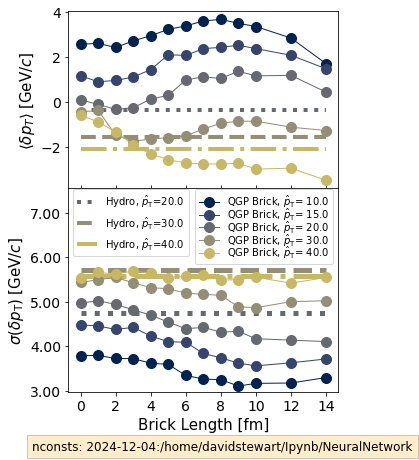

/tmp/ipykernel_150189/3806172290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
/tmp/ipykernel_150189/3806172290.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(yticklabels)


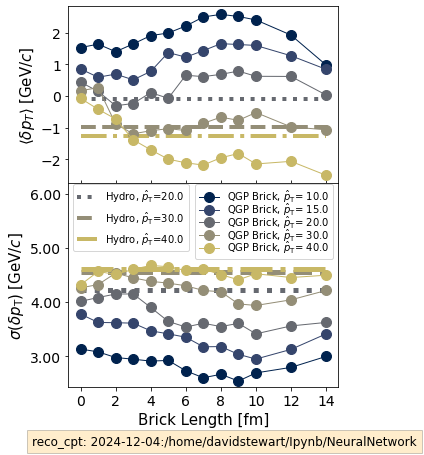

/tmp/ipykernel_150189/3806172290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['plot_names'] = df_loc.apply(lambda row: make_name(row), axis=1)
/tmp/ipykernel_150189/3806172290.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(yticklabels)


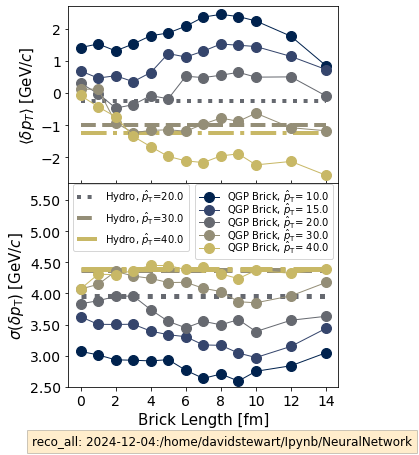

In [6]:
plot_all_scores('rhoAonly',r'ML using $\rho\times{}A$')
plot_all_scores('angularity',r'ML using angularity')
plot_all_scores('nconsts',r'ML using $N_\mathrm{consts}$')
plot_all_scores('reco_cpt',r'ML using leading 10 $p_\mathrm{T}^\mathrm{consts}$')
plot_all_scores('reco_all',r'ML using all above')